In [1]:
import sys

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

sys.path.append('../src')
import const

In [3]:
train_df = pd.read_csv('../data/input/train_metadata.csv')
test_position_df = pd.DataFrame.from_dict(const.POS_DICT, orient="index")

In [5]:
test_position_df

,latitude,longitude
COR,10.12,-84.51
COL,5.57,-75.85
SNE,38.49,-119.95
SSW,42.47,-76.45


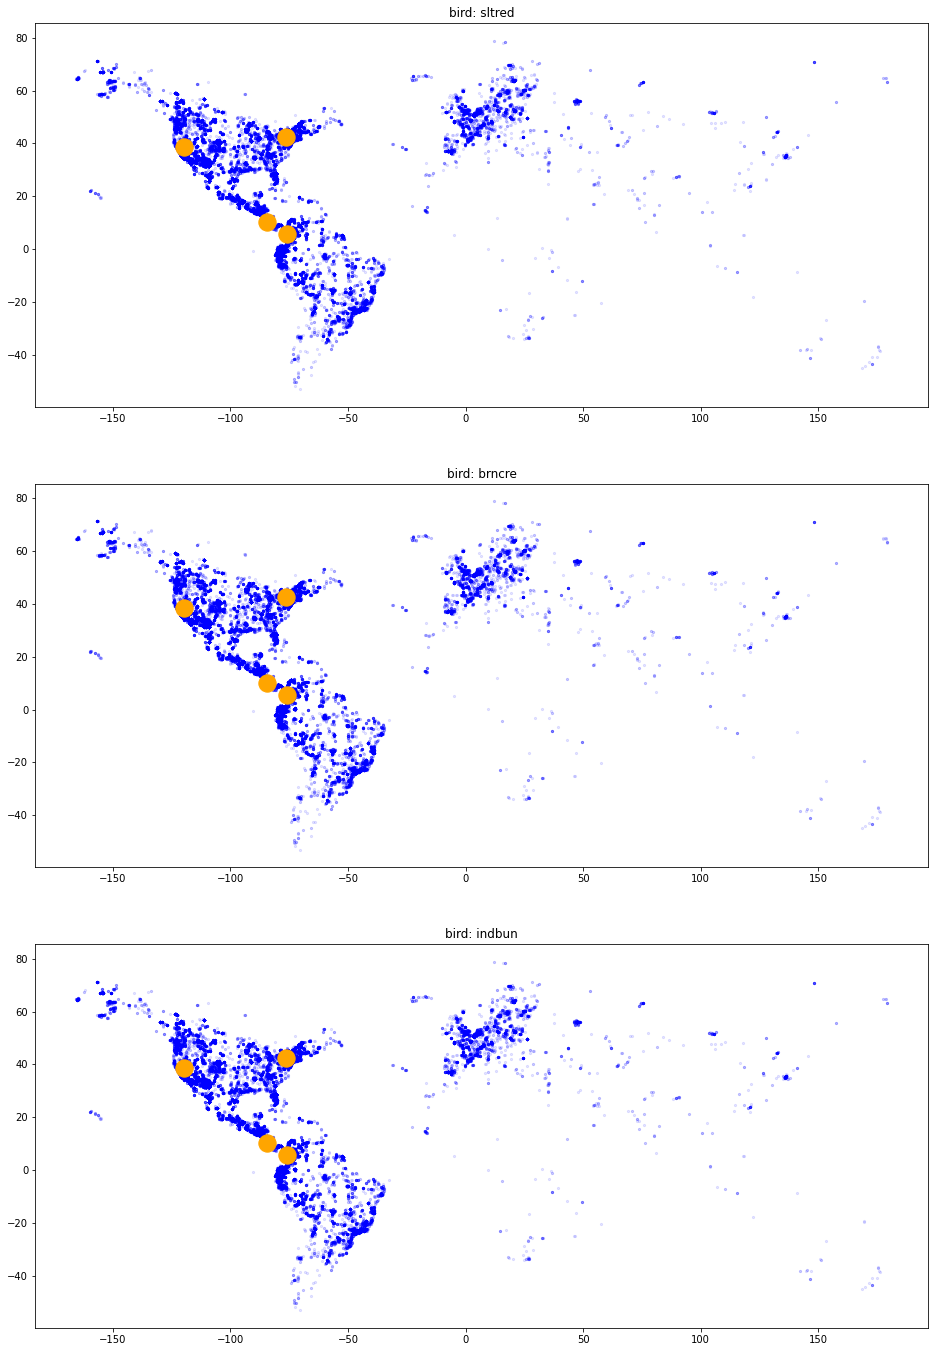

In [16]:
bird_idxs = [309, 58, 183]

plt.figure(figsize=(16, 8 * len(bird_idxs)))
for i, bird_idx in enumerate(bird_idxs):
    bird = list(const.BIRD_CODE.keys())[bird_idx]

    bird_idx = train_df[train_df["primary_label"] == bird].index.values
    else_idx = train_df[train_df["primary_label"] != bird].index.values
    
    plt.subplot(len(bird_idxs), 1, i + 1)
    plt.title(f"bird: {bird}")
    plt.scatter(train_df.loc[else_idx, "longitude"].values, train_df.loc[else_idx, "latitude"].values, s=5, c="blue", alpha=0.1)
    plt.scatter(test_position_df["longitude"].values, test_position_df["latitude"].values, s=300, c="orange")
#     plt.scatter(train_df.loc[bird_idx, "longitude"].values, train_df.loc[bird_idx, "latitude"].values, s=20, c="yellow")

In [76]:
np.random.rand() * 10

5.37380455574524